In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns


In [2]:
df_r = pd.read_csv("Data/FoodAccessResearchAtlasData2019.csv")
df_r.head()

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga County,1,1912,693,0,0.0,0.00,0,...,221.0,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0
1,1001020200,Alabama,Autauga County,1,2170,743,0,181.0,8.34,1,...,214.0,888.0,1217.0,5.0,0.0,5.0,55.0,75.0,89.0,156.0
2,1001020300,Alabama,Autauga County,1,3373,1256,0,0.0,0.00,0,...,439.0,2576.0,647.0,17.0,5.0,11.0,117.0,87.0,99.0,172.0
3,1001020400,Alabama,Autauga County,1,4386,1722,0,0.0,0.00,0,...,904.0,4086.0,193.0,18.0,4.0,11.0,74.0,85.0,21.0,98.0
4,1001020500,Alabama,Autauga County,1,10766,4082,0,181.0,1.68,0,...,1126.0,8666.0,1437.0,296.0,9.0,48.0,310.0,355.0,230.0,339.0


In [3]:
# Calculate missing value ratios
missing_ratio = df_r.isnull().sum() / len(df_r)

# Filter columns with more than 50% missing values
threshold = 0.5
cols_above_threshold = missing_ratio[missing_ratio > threshold].sort_values(ascending=False)

# Convert to DataFrame and format as percentages
high_missing_df = cols_above_threshold.to_frame(name='Missing Percentage')
high_missing_df['Missing Percentage'] *= 100  # Convert to percent

# Display the result
print("Columns with >50% missing values:\n")
print(high_missing_df)
print(" ")
print(high_missing_df.count())

Columns with >50% missing values:

                  Missing Percentage
lapop20                    97.923646
laasian20share             97.923646
lalowi20share              97.923646
lakids20                   97.923646
lakids20share              97.923646
laseniors20                97.923646
laseniors20share           97.923646
lawhite20                  97.923646
lawhite20share             97.923646
lablack20                  97.923646
lablack20share             97.923646
laasian20                  97.923646
lanhopi20                  97.923646
lapop20share               97.923646
lanhopi20share             97.923646
laaian20                   97.923646
laaian20share              97.923646
laomultir20                97.923646
laomultir20share           97.923646
lahisp20                   97.923646
lahisp20share              97.923646
lahunv20                   97.923646
lasnap20                   97.923646
lalowi20                   97.923646
lahunv20share              97.778881
las

Most of those columns are granular sub-demographic breakdowns for different distances (e.g., within 0.5, 1, 10, 20 miles of a supermarket), and highly correlated with each other. So we can remove them

In [4]:
cols_to_drop = missing_ratio[missing_ratio > threshold].index.tolist()
# Step 3: Drop those columns
df_cleaned = df_r.drop(columns=cols_to_drop)

# Step 4: Display result
print(f"Dropped {len(cols_to_drop)} columns. Remaining shape: {df_cleaned.shape}")

Dropped 52 columns. Remaining shape: (72531, 95)


In [5]:
df_cleaned.head()

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga County,1,1912,693,0,0.0,0.00,0,...,221.0,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0
1,1001020200,Alabama,Autauga County,1,2170,743,0,181.0,8.34,1,...,214.0,888.0,1217.0,5.0,0.0,5.0,55.0,75.0,89.0,156.0
2,1001020300,Alabama,Autauga County,1,3373,1256,0,0.0,0.00,0,...,439.0,2576.0,647.0,17.0,5.0,11.0,117.0,87.0,99.0,172.0
3,1001020400,Alabama,Autauga County,1,4386,1722,0,0.0,0.00,0,...,904.0,4086.0,193.0,18.0,4.0,11.0,74.0,85.0,21.0,98.0
4,1001020500,Alabama,Autauga County,1,10766,4082,0,181.0,1.68,0,...,1126.0,8666.0,1437.0,296.0,9.0,48.0,310.0,355.0,230.0,339.0


In [6]:
missing_counts = df_cleaned.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)

# Step 4: Add percentage of missing values
missing_percent = (missing_counts / len(df_cleaned)) * 100
missing_summary = pd.DataFrame({
    'Missing Values': missing_counts,
    'Percentage (%)': missing_percent
})

# Step 5: Display result
print("Remaining columns with missing values:\n")
print(missing_summary)

Remaining columns with missing values:

               Missing Values  Percentage (%)
LAPOP1_20               35914       49.515380
LALOWI1_20              35914       49.515380
LAPOP1_10               29957       41.302340
LALOWI1_10              29957       41.302340
lapop1share             19989       27.559251
...                       ...             ...
TractOMultir                4        0.005515
TractHispanic               4        0.005515
TractHUNV                   4        0.005515
TractSNAP                   4        0.005515
PovertyRate                 3        0.004136

[74 rows x 2 columns]


In [13]:
missing_percent1 = df_cleaned.isnull().sum() / len(df_cleaned)
# Step 2: Drop columns with more than 30% missing values
cols_to_drop = missing_percent[missing_percent1 > 0.3].index
df_new = df_cleaned.drop(columns=cols_to_drop)

# Display the result
print(f"Dropped {len(cols_to_drop)} columns with more than 30% missing values.")
print("Remaining columns:", df_new.shape[1])

Dropped 4 columns with more than 30% missing values.
Remaining columns: 91


In [14]:
# Separate columns to fill
low_missing_cols = missing_percent1[(missing_percent1 > 0) & (missing_percent1 <= 0.05)].index
mid_missing_cols = missing_percent1[(missing_percent1 > 0.05) & (missing_percent1 <= 0.3)].index

In [16]:
print(low_missing_cols)

Index(['NUMGQTRS', 'PCTGQTRS', 'PovertyRate', 'MedianFamilyIncome',
       'TractLOWI', 'TractKids', 'TractSeniors', 'TractWhite', 'TractBlack',
       'TractAsian', 'TractNHOPI', 'TractAIAN', 'TractOMultir',
       'TractHispanic', 'TractHUNV', 'TractSNAP'],
      dtype='object')


In [17]:
# Fill <5% missing columns with median/mode
for col in low_missing_cols:
    if df_new[col].dtype in ['float64', 'int64']:
        df_new[col] = df_new[col].fillna(df_new[col].median())
    else:
        df_new[col] = df_new[col].fillna(df_new[col].mode()[0])

Since the above rows have less than 5% of missing data, we have decided to implemen the median/mode imputation technique to handle to cover the missing the data.

In [28]:

missing = df_new.isna().sum()
missing = missing[missing > 0]
# Create summary DataFrame
summary = pd.DataFrame({
    'Column': missing.index,
    'Data Type': df_new[missing.index].dtypes.values,
    'Missing Values': missing.values,
    '% Missing': (missing.values / len(df_new)) * 100
})

print(summary)

                Column Data Type  Missing Values  % Missing
0           LAPOP05_10   float64           14540  20.046601
1          LALOWI05_10   float64           14540  20.046601
2            lapophalf   float64            4568   6.297997
3       lapophalfshare   float64            4568   6.297997
4           lalowihalf   float64            4568   6.297997
5      lalowihalfshare   float64            4568   6.297997
6           lakidshalf   float64            4568   6.297997
7      lakidshalfshare   float64            4568   6.297997
8        laseniorshalf   float64            4568   6.297997
9   laseniorshalfshare   float64            4568   6.297997
10         lawhitehalf   float64            4568   6.297997
11    lawhitehalfshare   float64            4568   6.297997
12         lablackhalf   float64            4568   6.297997
13    lablackhalfshare   float64            4568   6.297997
14         laasianhalf   float64            4568   6.297997
15    laasianhalfshare   float64        

In [29]:
from sklearn.impute import KNNImputer
numeric_cols = df_new.select_dtypes(include=['float64', 'int64']).columns
numeric_with_nans = [col for col in numeric_cols if df_new[col].isnull().sum() > 0]

# Step 2: Subset dataframe
df_numeric = df_new[numeric_with_nans]

# Step 3: Apply KNN Imputer
imputer = KNNImputer(n_neighbors=5)
df_numeric_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

# Step 4: Replace imputed columns back in the original dataframe
df_new.update(df_numeric_imputed)

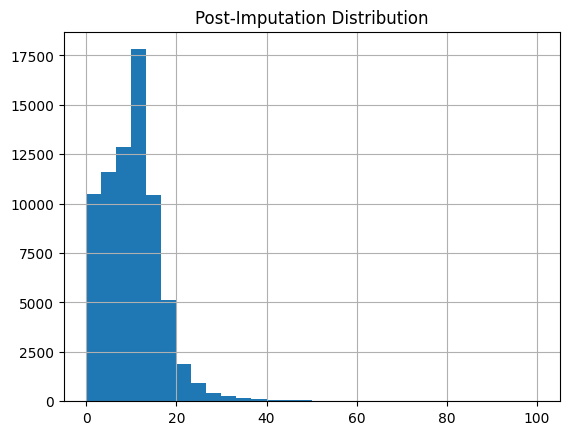

In [36]:
df_new['laseniorshalfshare'].hist(bins=30)
plt.title("Post-Imputation Distribution")
plt.show()

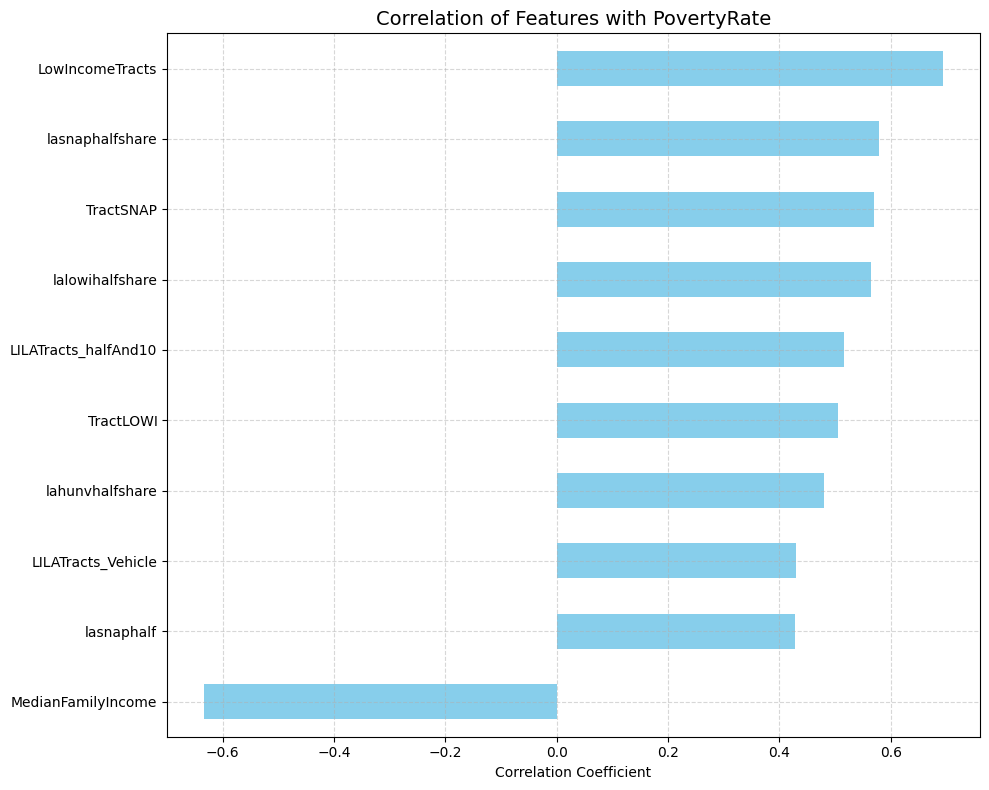

In [47]:
# Keep only numeric columns
df_numeric = df_new.select_dtypes(include=['float64', 'int64'])


# Compute correlation with PovertyRate
poverty_corr = df_numeric.corr()['PovertyRate'].sort_values(ascending=False)

threshold = 0.4
high_corr = poverty_corr[(poverty_corr >= threshold) | (poverty_corr <= -threshold)]

# Plot top positively and negatively correlated features
plt.figure(figsize=(10, 8))
high_corr.drop('PovertyRate').sort_values().plot(kind='barh', color='skyblue')
plt.title("Correlation of Features with PovertyRate", fontsize=14)
plt.xlabel("Correlation Coefficient")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [37]:
df_new.to_csv('df_new.csv', index=False)
